Student Details

Name: Tom Keane

ID: 20214537

All necessary imports are provided. Please do not add further imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

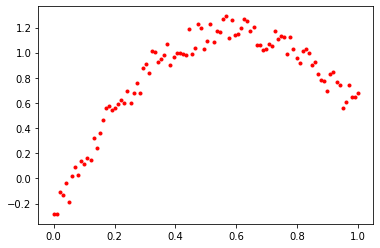

In [4]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [6]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [8]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [10]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [12]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

## Task 4

In [14]:
X_trans = transPoly(X,50)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.5, random_state =5)
# random_state fixed to get reproducible (and 'good'! :-)) results

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [16]:
def plot_lambdas_vs_E(lambdas, ein, eout, plot_axis):
    plot_axis.plot(lambdas, ein, label='ein')
    plot_axis.plot(lambdas, eout, label='eout')
    plot_axis.set_ylabel("Mean square Error")
    plot_axis.set_xlabel("regularization rate (λ)")
    plot_axis.set_ylim(0,ein[-1]*1.5)
    plot_axis.legend()

def generate_lambda_plot(X_train, X_test, y_train, y_test, lam_min, lam_max, dl, plot_axis):
    ein=[]
    eout=[]
    weights=[]
    lambdas = np.arange(lam_min, lam_max, dl)
    for l in lambdas:    
        w = weights_reg(X_train,y_train,l)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
        weights.append(w)
    plot_lambdas_vs_E(lambdas, ein, eout, plot_axis)
    return lambdas, ein, eout

In [18]:
def task4_Ein_Eout_λ_analysis(X_train, X_test, y_train, y_test):
        fig, axes = plt.subplots(1, 1, figsize=(5, 5))
        lambdas, ein, eout = generate_lambda_plot(X_train, X_test, y_train, y_test, 0, 1, 0.05, axes)

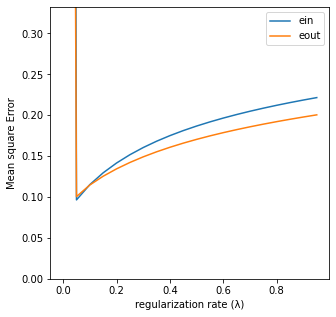

In [20]:
task4_Ein_Eout_λ_analysis(X_train, X_test, y_train, y_test)

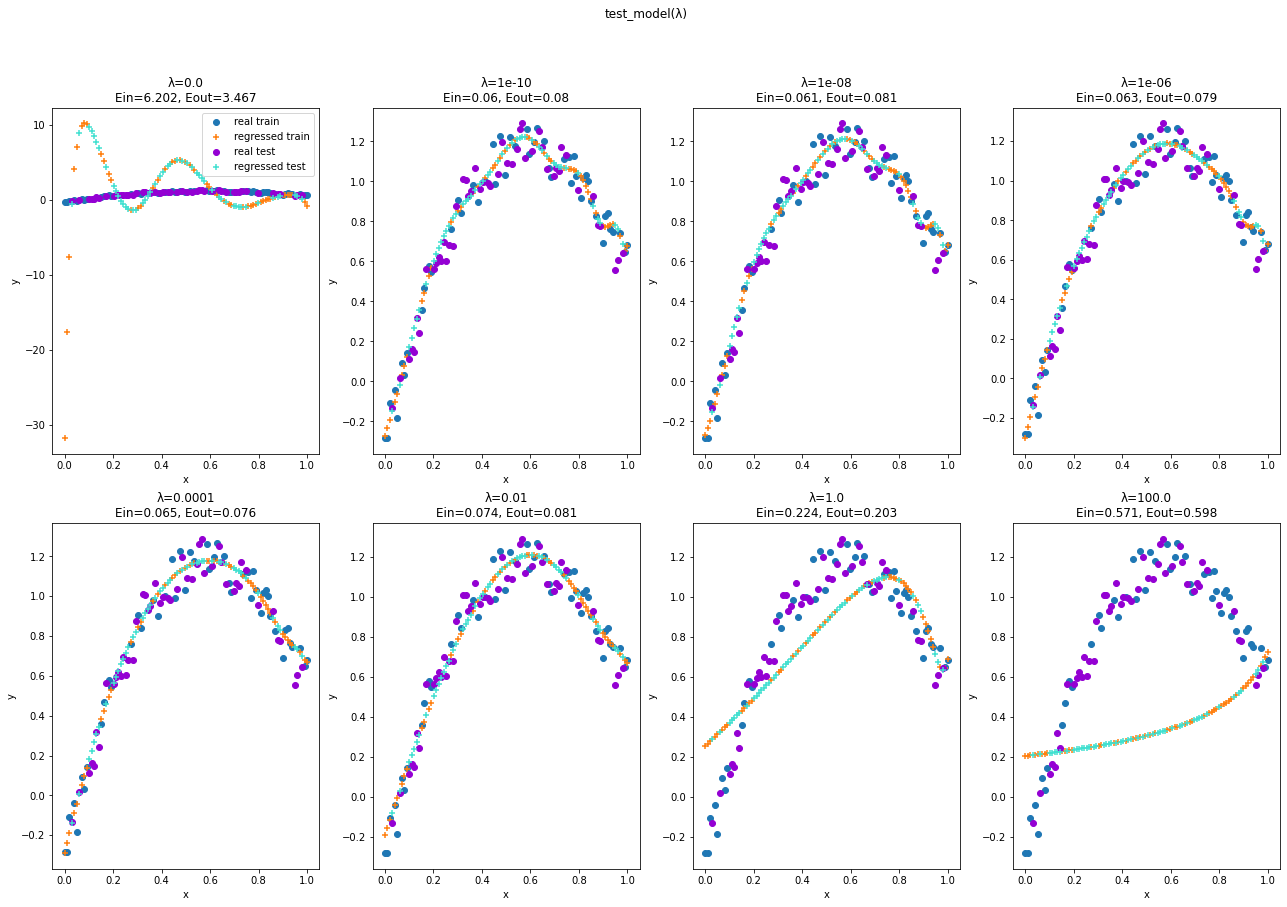

In [22]:
def test_model(X_train,y_train, X_test, y_test, plot_less=False):
        f, axes = plt.subplots(2, 4, figsize=(22, 14))
        f.suptitle("test_model(λ)")
        λs = np.append([0], [10**(2*i-10) for i in range(7)])
        ws = np.empty((0,51))
        for λ, ax in zip(λs, axes.flatten()):
                w = weights_reg(X_train,y_train,λ)
                ws = np.append(ws, [w], axis=0)
                y_trainPred = lin_reg(w, X_train)
                y_testPred  = lin_reg(w,  X_test )
                Ein, Eout =  (round(calc_error(w,X_train,y_train),3),
                             round(calc_error(w,X_test,y_test),3))
                plot_model_results(X_train[:,1], y_train, ax, y_pred=y_trainPred, labels=['real train', 'regressed train'  ] )
                plot_model_results(X_test[:,1],  y_test,  ax,  y_pred=y_testPred, c_real='darkviolet', c_pred='turquoise', labels=['real test', 'regressed test'  ] )
                ax.set_title(f"λ={λ}\nEin={Ein}, Eout={Eout}")
        axes[0][0].legend()
        return λs, ws

def plot_model_results(X, y, ax, y_pred=None, c_real=None, c_pred=None, labels=['','']):
        ax.scatter(X, y, label=labels[0], c=c_real)
        if y_pred is not None:
            ax.scatter(X, y_pred, marker='+', label=labels[1], c=c_pred)
        ax.set_xlabel("x")
        ax.set_ylabel("y")

def plot_weights(λs, ws):
    fig, (ax0, ax1, ax2, ax_std) = plt.subplots(4,1, figsize=(22,16),  sharey='row')
    fig.suptitle("Weight values for each λ")
    ax1.set_ylim(-2500,2000)
    ax2.set_ylim(-20,20)
    D_id_color = {λs[0]: u'orchid', λs[1]: u'red', λs[2]: u'grey', λs[3]: u'dodgerblue',
                   λs[4]: u'turquoise', λs[5]: u'darkviolet', λs[6]:'Green', λs[7]:'darkcyan'}
    for λ, w in zip(λs, ws):
        ax0.plot(w, label=f"λ={λ}", linestyle='dashed', marker='s', c=D_id_color[λ])
        ax1.plot(w, label=f"λ={λ}", linestyle='dashed', marker='s', c=D_id_color[λ])
        if λ>0.0000001:
            ax2.plot(w, label=f"λ={λ}", linestyle='dashed', marker='s', c=D_id_color[λ])
    ax0.legend()
    λ_labels = [f"λ={λ}" for λ in λs]
    ax_std.plot(λ_labels, np.std(ws, axis=1))
    ax_std.set_title("standard deviations")
    ax_std.set_ylim(0, 800)
    ax_std.annotate(str(np.round(np.std(ws, axis=1)[0],2)),
                        xy=(λ_labels[0],500), fontsize=15)
    for i,j in zip(λ_labels[1:], np.round(np.std(ws, axis=1)[1:], 3)):
        ax_std.annotate(str(j),xy=(i,j+5), fontsize=15)
    ax0.annotate(f"most influential weights over all sets:\n{analyze_weights(λs, ws)}", xy=(0, 1.9*10**8), fontsize=10)

def analyze_weights(λs, ws, kth=10):
    big_w = []
    for w in ws:
        big_w = np.append(big_w, np.abs(w).argsort()[-5:][::-1])
    values, counts = np.unique(big_w, return_counts=True)
    ind = np.argpartition(-counts, kth=kth)[:kth]
    return   np.sort(values[ind])
λs, ws = test_model(X_train,y_train, X_test, y_test)

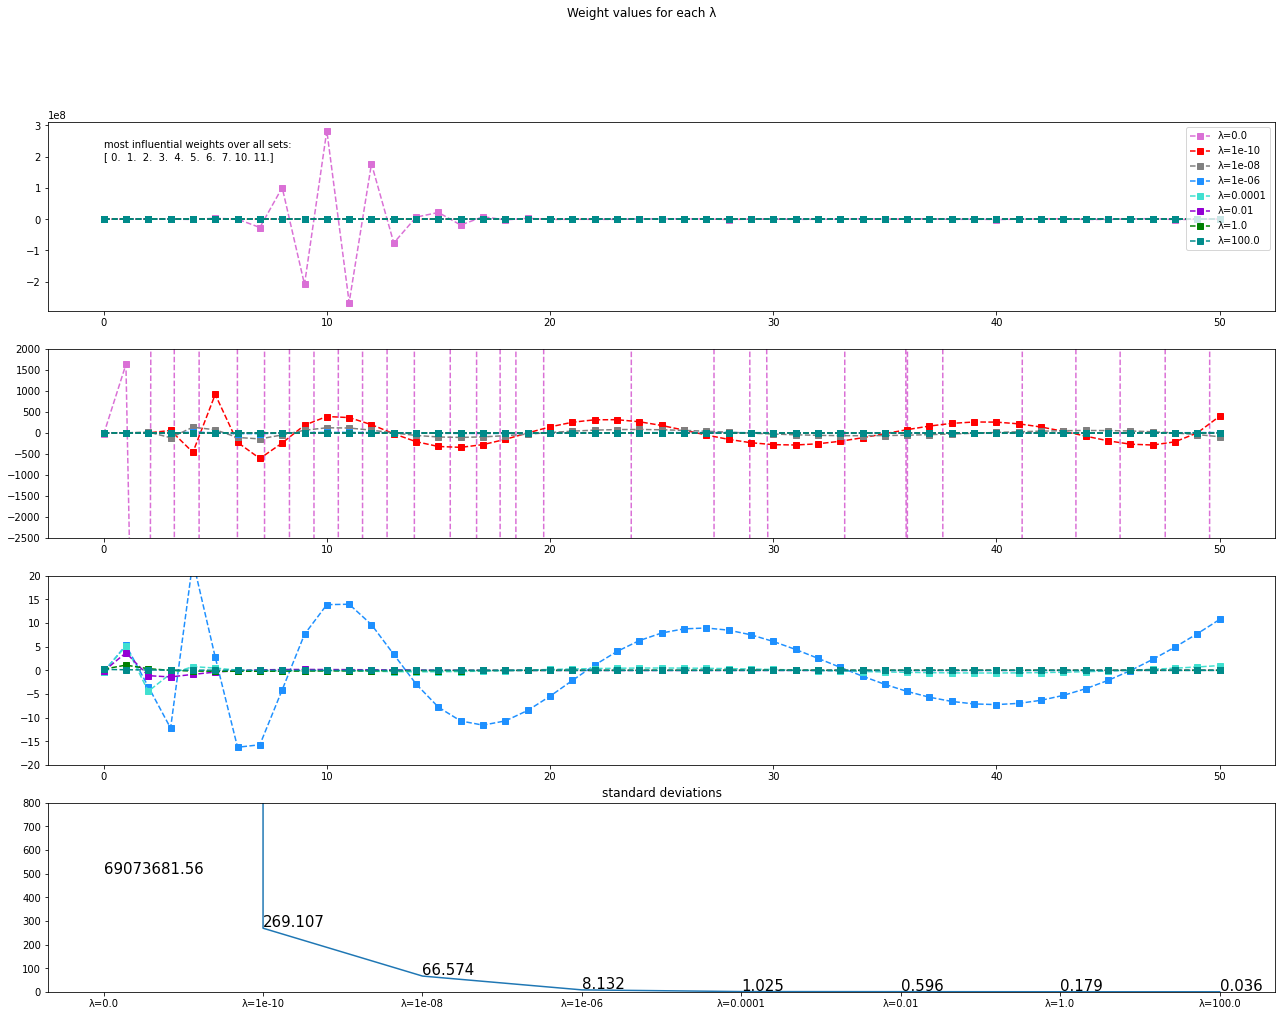

In [24]:
plot_weights(λs, ws)

The most useful set of weights for is for $λ=10^{-10}$, which is plotted in red.

There is a lot of interesting information in the above plots.
- As expected, the deviation of weights reduces sharply as the **regularization rate**, λ approaches 1. The deviation then steadily approaches 0 as λ inreases from there.

- Another interesting observation is that the weights appear to obey a cyclical pattern.

## Task 5

In [37]:
def KFold_analysis(X_train, X_test, y_train, y_test, n_splits):
    kf = KFold(n_splits=n_splits)
    fig, axes = plt.subplots(4, n_splits//2, figsize=(27, 27),  sharey='row')
    fig.suptitle(f"___10-FOLD CROSS VALIDATION___\n\ndispaying:\n in/out-sample Error,\n Mean and standard deviation for test sample,\n most effective regression rate (λ)")
    train_test = np.array(list(kf.split(X_train, y_train)))
    indexes = np.array([np.arange(len(axes.flatten())//2)]).transpose()
    for train, test, index in np.append( train_test, indexes, axis=1 ):
        i, j = index%5, 0 if index < 5 else 2
        lambdas, ein, eout = generate_lambda_plot(X_train[train], X_test[test], y_train[train],
                                                    y_test[test], 0, 1, 0.05, axes[j+1][i])
        bestλ, mid_λ, bad_λ = lambdas[np.argmin(eout)],0.8, 10
        best_w, mid_w, bad_w = (weights_reg(X_train[train],y_train[train],bestλ),
                                weights_reg(X_train[train],y_train[train],mid_λ),
                                weights_reg(X_train[train],y_train[train],bad_λ))
        best_y_train_pred, best_y_test_pred = (lin_reg(best_w, X_train[train]),
                                               lin_reg(best_w, X_test[test]))
        mid_y_train_pred, mid_y_test_pred = (lin_reg(mid_w,  X_train[train]),
                                               lin_reg(mid_w,  X_test[test]))
        bad_y_train_pred, bad_y_test_pred = (lin_reg(bad_w,  X_train[train]),
                                               lin_reg(bad_w,  X_test[test]))
        plot_model_results(X_train[train][:,1], y_train[train], axes[j][i], y_pred=best_y_train_pred, labels=['real-train', 'predicted-train'])
        plot_model_results(X_test[test][:,1], y_test[test], axes[j][i], y_pred=best_y_test_pred, c_real='turquoise', c_pred='red', labels=['real-test', 'predicted-test'])
        axes[j][i].scatter(X_train[train][:,1], mid_y_train_pred, marker='.', label=f'mid λ={mid_λ}', alpha=0.3)
        axes[j][i].scatter(X_train[train][:,1], bad_y_train_pred, marker='.', label=f'bad λ={bad_λ}', alpha=0.3)
        Ein, Eout =  (round(calc_error(best_w,X_train,y_train),3),
                      round(calc_error(best_w,X_test,y_test),3))
        axes[j+1][i].set_title(f'fold-{index+1}')
        axes[j][i].set_title(f'fold-{index+1}')
        axes[j][i].annotate(f'Ein={round(np.min(ein),3)}, Eout={round(np.min(eout),3)}\nx̄_test={round(np.mean(X_test[test][:,1]), 3)}, X_test_std={round(np.std(X_test[test][:,1]), 3)}\nbest_λ={round(bestλ, 2)}',xy=(0.25,0.2), fontsize=10)
    axes[2][0].legend()
    axes[0][0].legend()

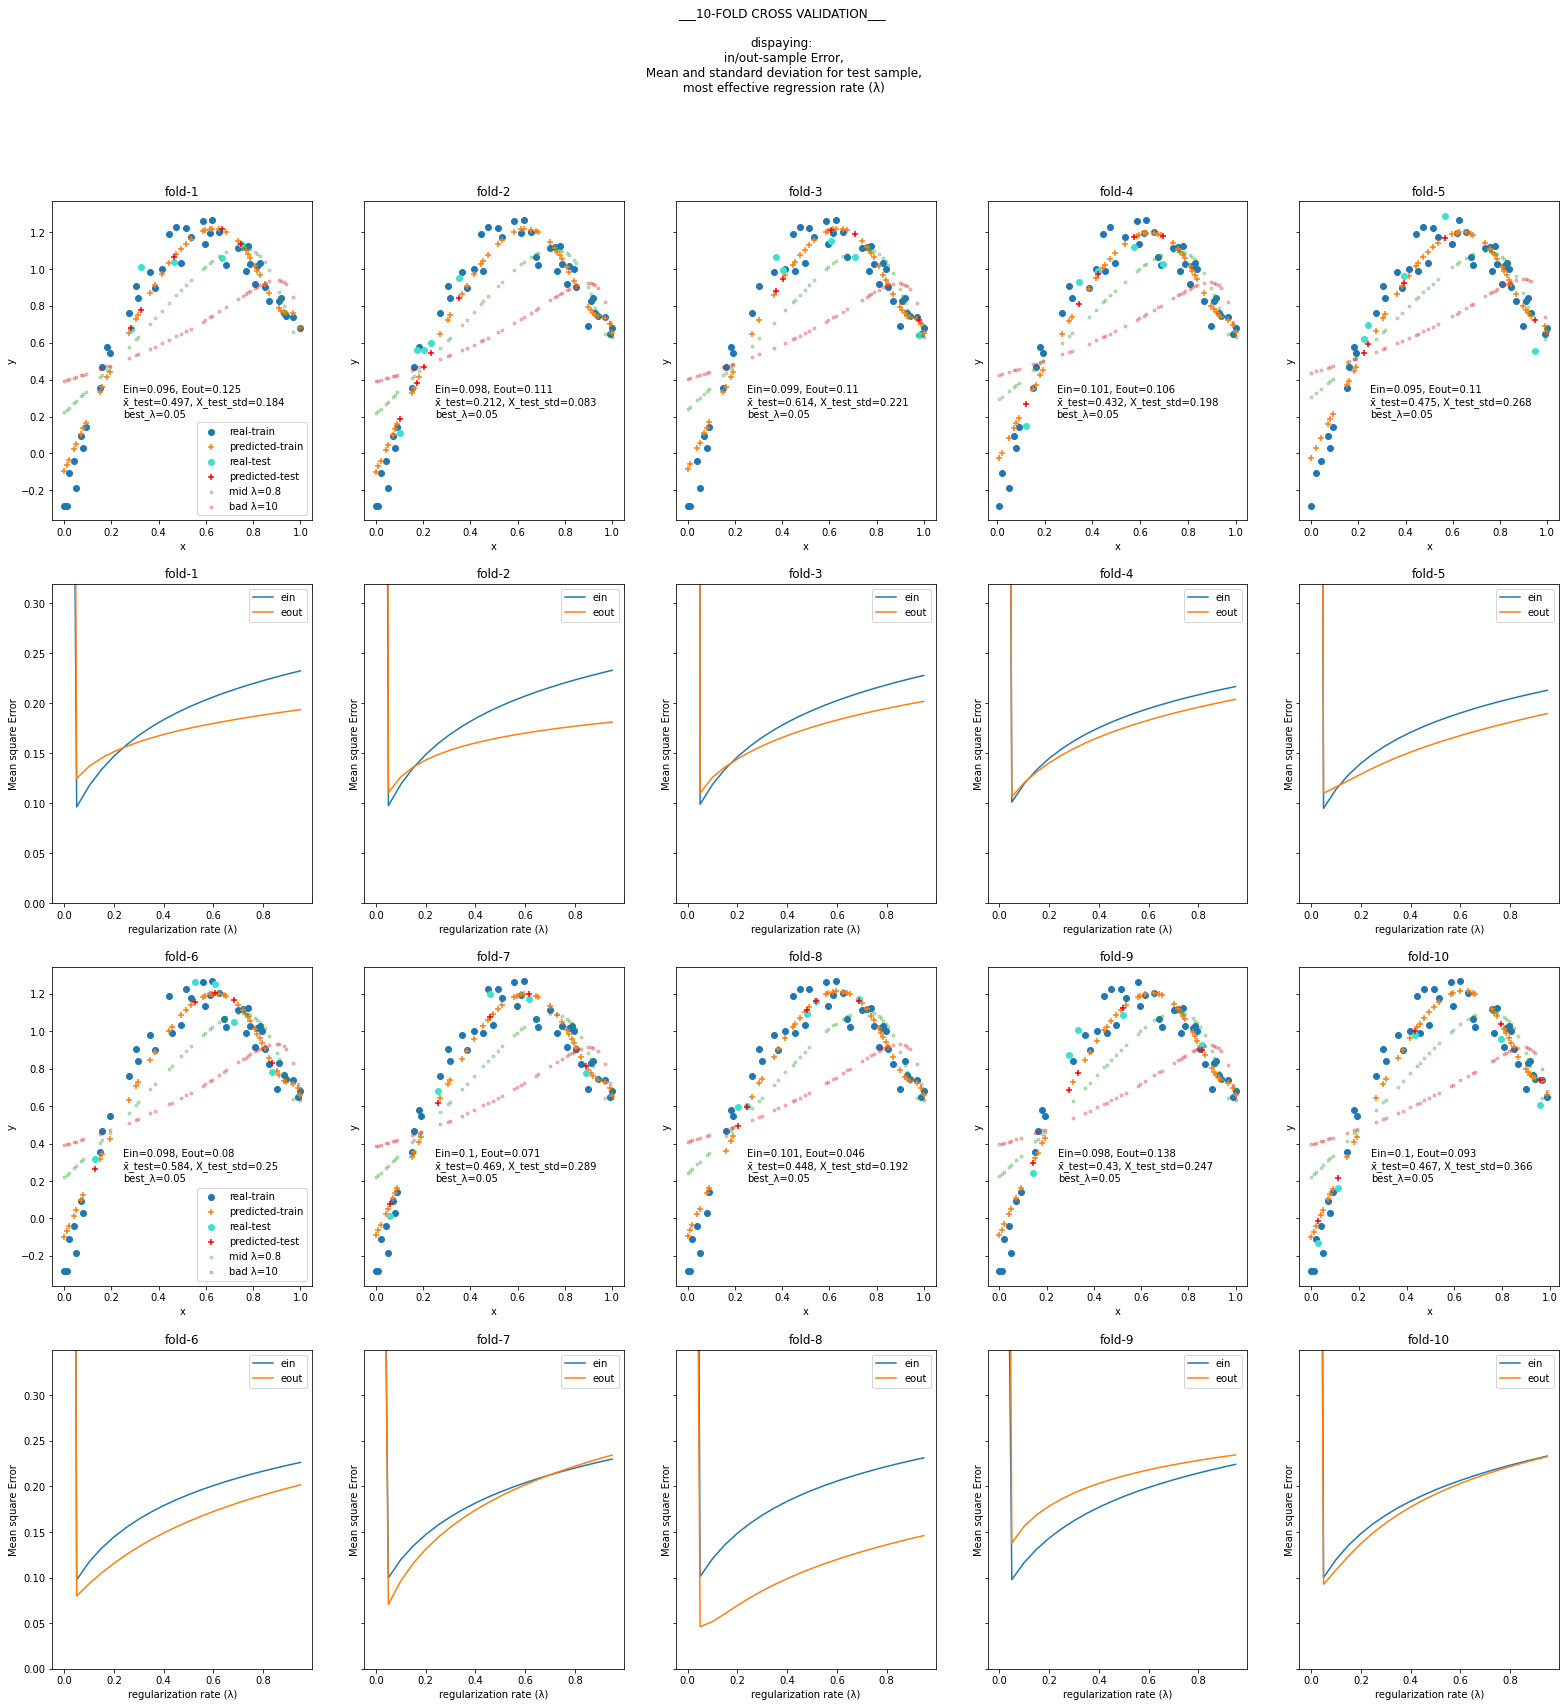

In [38]:
KFold_analysis(X_train, X_test, y_train, y_test, 10)

There is a large discrepency in the effect that **regularization rate** has from one train/test split to another. This is likely due to the relatively small data set of 100 points. More data-points may have led to slightly more consistent results.
## Error Analysis
Our data-set is generated by applying a noise of $0.25$ to the target function. This model's error function is calculated by applying the mean squared error (MSE) of our regressed function to our data-set.
This means that when working at max capacity, the lowest MSE that can realistically be expected is $0.25^2 = 0.0625$.

For each k-split, the bestλ $E_{out}$ generally stays within {0.03 - 0.11}, centered around 0.06, roughly. It is noteworthy that this makes sense, according to the mean square of the noise applied to the data-set.

## Other trends
- A recurring trend is that best $E_{out}$ results come when the test-sets mean X coord (x̄̄) is closer to the turning point around x=0.6. There is of course a random element though, and at such fine margins any difference may simply be due to the randomly geting a conveniant test set.
- The standard deviation along X_test seems to be less influential.

## Task 6

best regularization strength - α


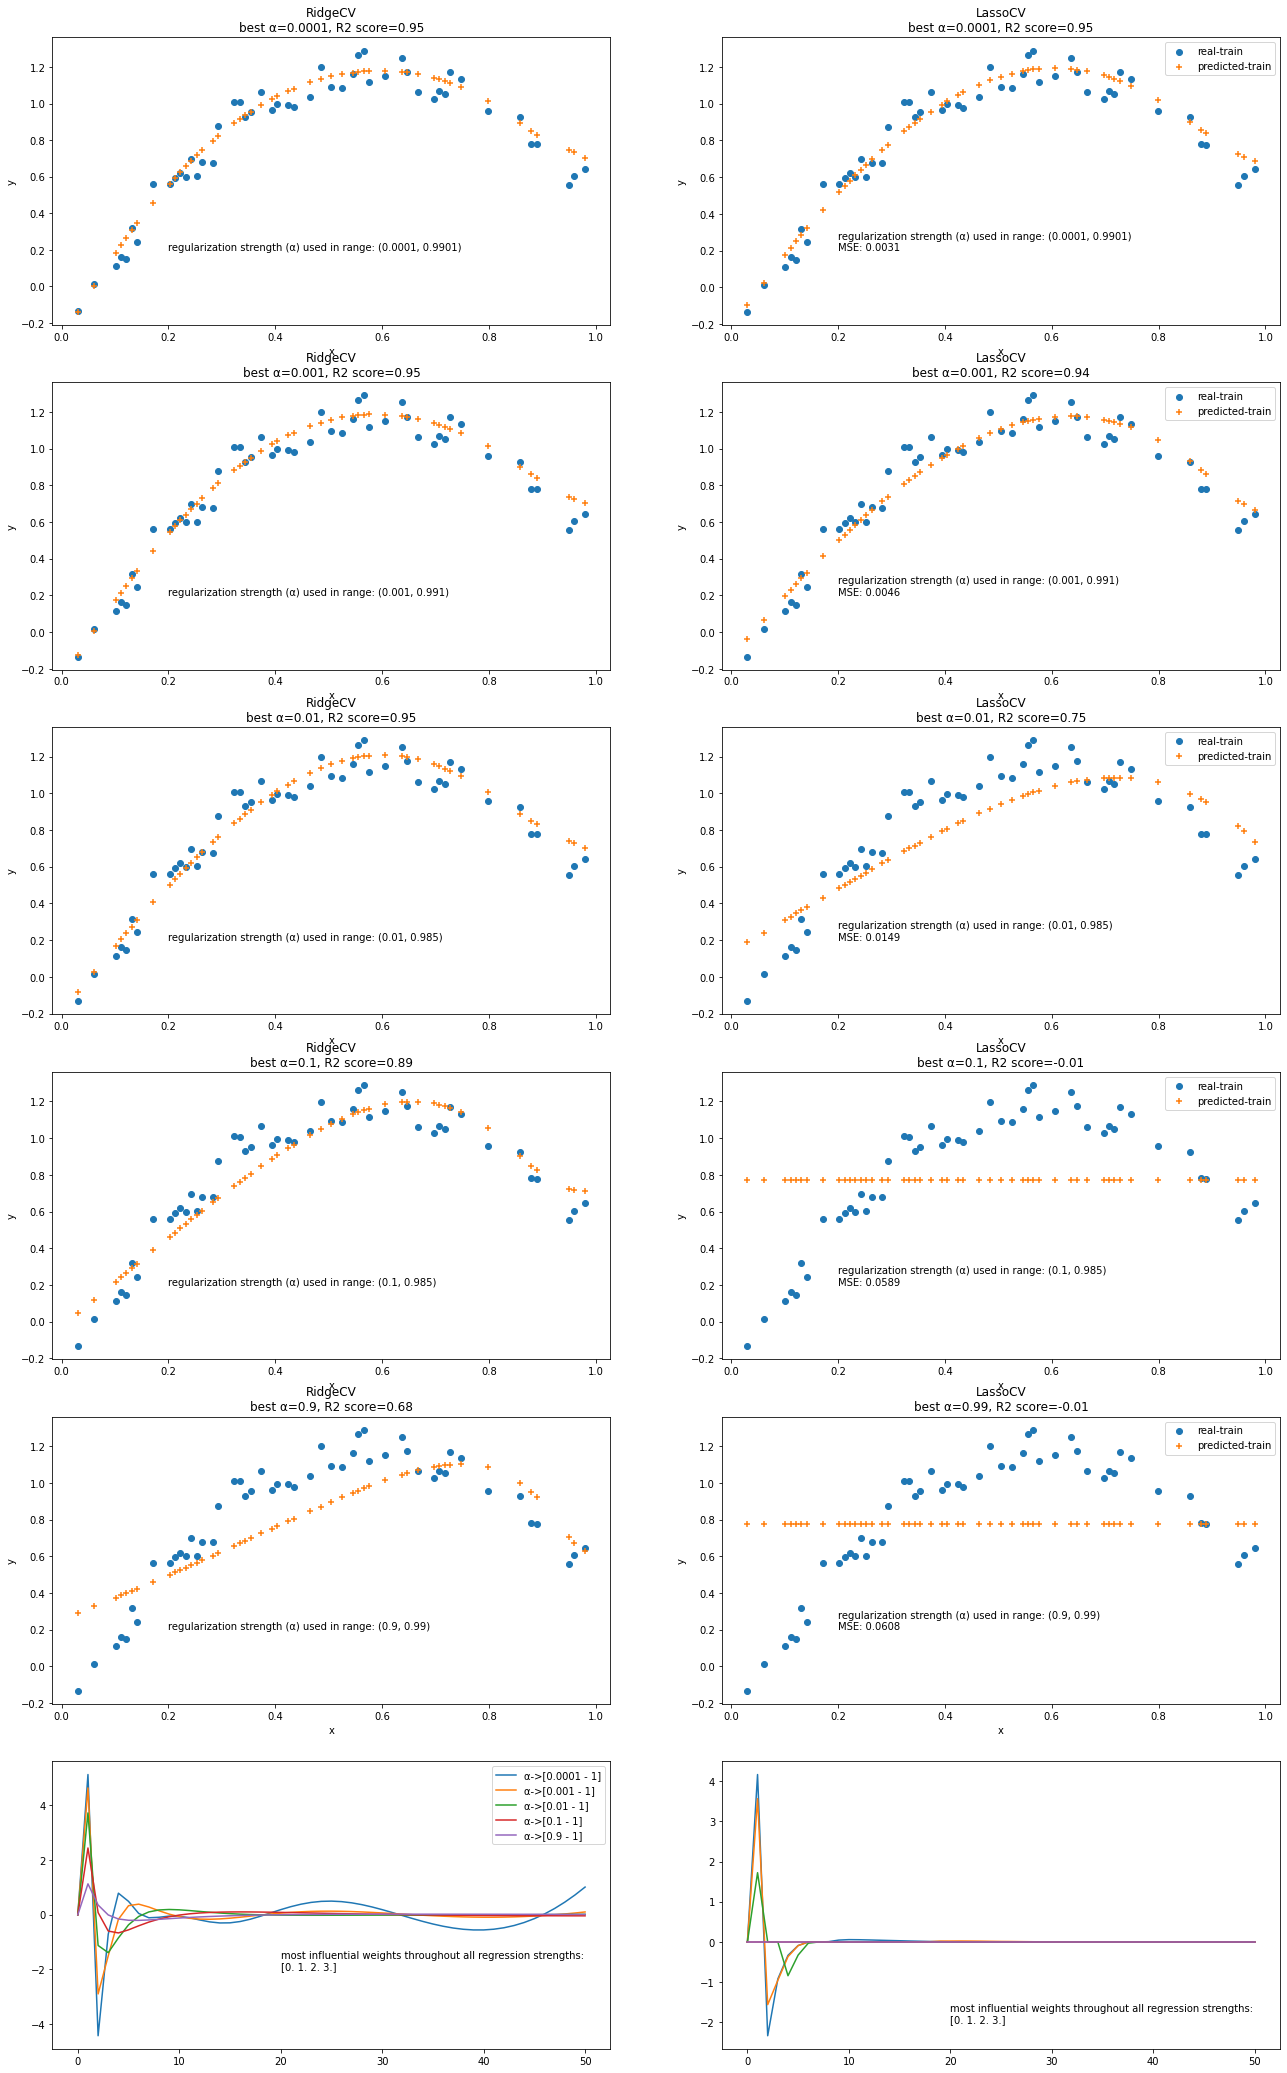

In [39]:
def fit_predict(regr, X_train, y_train, X_test, y_test):
    regr.fit(X_train, y_train)
    return regr.predict(X_test), round(regr.alpha_, 5), round(regr.score(X_test, y_test), 2)

def RidgeCV_LassoCV_analysis(X_train, X_test, y_train, y_test):
    lcv_ws, rcv_ws= (np.empty((51, 0)),
                     np.empty((51, 0)))
    f, axes = plt.subplots(6, 2, figsize=(22, 37))
    for min_α, axis in zip([0.0001, 0.001, 0.01, 0.1, 0.9], axes):
        αs = np.arange(min_α, 0.999, 0.015)
        (   RCV_y_pred, RCV_best_α, RCV_score,
            LCV_y_pred, LCV_best_α, LCV_score, LCV_MSE,
            LCV_coefs, RCV_coefs
         ) = RidgeCV_LassoCV_setup(X_train, X_test, y_train, y_test, αs)
        plot_RidgeCV_LassoCV_analysis(X_test, y_test, RCV_y_pred, LCV_y_pred, RCV_best_α, LCV_best_α, RCV_score, LCV_score, LCV_MSE, αs, axis)
        plot_RidgeCV_LassoCV_weights(LCV_coefs, RCV_coefs, axes[-1], labels=[f'α->[{min_α} - 1]', f'α->[{min_α} - 1]'])
        lcv_ws=np.append(lcv_ws, np.transpose([LCV_coefs]), axis=1)
        rcv_ws=np.append(rcv_ws, np.transpose([RCV_coefs]), axis=1)
    axes[-1][0].annotate(f"most influential weights throughout all regression strengths:\n{analyze_weights(αs, rcv_ws, kth=4)}", xy=(20,-2))
    axes[-1][1].annotate(f"most influential weights throughout all regression strengths:\n{analyze_weights(αs, lcv_ws, kth=4)}", xy=(20,-2))
        

def RidgeCV_LassoCV_setup(X_train, X_test, y_train, y_test, αs):
    rcv, lcv = (RidgeCV(alphas = αs),
                LassoCV(alphas=αs, tol=0.01))
    RCV_y_pred, RCV_best_α, RCV_score = fit_predict(rcv, X_train, y_train, X_test, y_test)
    LCV_y_pred, LCV_best_α, LCV_score = fit_predict(lcv, X_train, y_train, X_test, y_test)
    LCV_MSE = lcv.mse_path_.flatten()
    LCV_coefs = lcv.coef_
    RCV_coefs = rcv.coef_
    return RCV_y_pred, RCV_best_α, RCV_score, LCV_y_pred, LCV_best_α, LCV_score, LCV_MSE, LCV_coefs, RCV_coefs

def plot_RidgeCV_LassoCV_analysis(X_test, y_test, RCV_y_pred, LCV_y_pred, RCV_best_α, LCV_best_α, RCV_score, LCV_score, LCV_MSE, αs, axis):
    plot_model_results(X_test[:,1], y_test, axis[0], y_pred=RCV_y_pred, labels=['real-train', 'predicted-train'])
    plot_model_results(X_test[:,1], y_test, axis[1], y_pred=LCV_y_pred, labels=['real-train', 'predicted-train'])
    α_range_str = f"regularization strength (α) used in range: {αs[0], np.round(αs[-1], 4)}"
    axis[0].set_title(f'RidgeCV\nbest α={RCV_best_α}, R2 score={RCV_score}')
    axis[1].set_title(f'LassoCV\nbest α={LCV_best_α}, R2 score={LCV_score}')
    axis[0].annotate(f"{α_range_str}", xy=(0.2, 0.2))
    axis[1].annotate(f"{α_range_str}\nMSE: {np.round(np.min(LCV_MSE), 4)}", xy=(0.2, 0.2))
    axis[1].legend()

def plot_RidgeCV_LassoCV_weights(LCV_coefs, RCV_coefs, axis, labels=['','']):
    axis[0].plot(RCV_coefs, label=labels[0])
    axis[1].plot(LCV_coefs, label=labels[1])
    # axis[1].set_ylim(np.min(LCV_coefs), np.max(LCV_coefs))
    axis[0].legend()

print(f"best regularization strength - α")
RidgeCV_LassoCV_analysis(X_train, X_test, y_train, y_test)

## Conclusion

Similarly to the previous models, we can see that the best performances are at very low regression rates/ strengths (α in the ridge/ lasso context).  The most influential weights are consistently [0,1,2,3] accross each regression weight, and for both models. It is interesting that this remains true, even when the model is performing with a poor regression rate.

From the above plots, it is also clear that both models are adversely effected by a rising regression rate, the Lasso model is more quickly effected, whereas the Ridge model's score gradually declines as regression rate rises.